<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9684,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22775600
9685,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
9686,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
9687,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9684,2024-08-16,418.470001
9685,2024-08-19,421.529999
9686,2024-08-20,424.799988
9687,2024-08-21,424.140015


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

<ipython-input-6-8bf308d6ac9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9684,2024-08-16
9685,2024-08-19
9686,2024-08-20
9687,2024-08-21


In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-08-16,418.470001
2024-08-19,421.529999
2024-08-20,424.799988


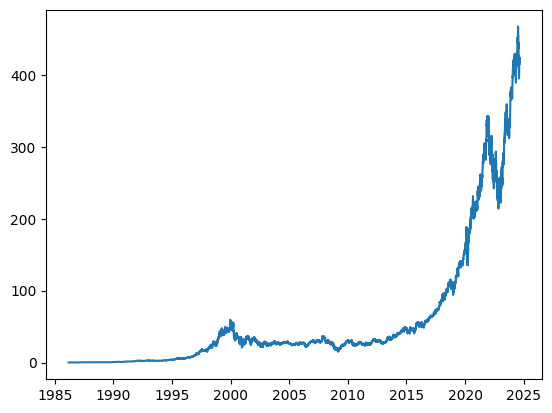

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [56]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '1986-08-05',
                                '2024-08-22',
                                n=100)
windowed_df

<ipython-input-56-660df8a84f28>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Target-{n-i}'] = X[:, i]
<ipython-input-56-660df8a84f28>:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df['Target'] = Y


,Target Date,Target-100,Target-99,Target-98,Target-97,Target-96,Target-95,Target-94,Target-93,Target-92,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1986-08-05,0.097222,0.100694,0.102431,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,...,0.104167,0.107639,0.108507,0.105903,0.103299,0.099826,0.098958,0.098090,0.098090,0.097222
1,1986-08-06,0.100694,0.102431,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,...,0.107639,0.108507,0.105903,0.103299,0.099826,0.098958,0.098090,0.098090,0.097222,0.096354
2,1986-08-07,0.102431,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,...,0.108507,0.105903,0.103299,0.099826,0.098958,0.098090,0.098090,0.097222,0.096354,0.095486
3,1986-08-08,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,0.095486,...,0.105903,0.103299,0.099826,0.098958,0.098090,0.098090,0.097222,0.096354,0.095486,0.096354
4,1986-08-11,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,0.095486,0.094618,...,0.103299,0.099826,0.098958,0.098090,0.098090,0.097222,0.096354,0.095486,0.096354,0.099826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,2024-08-16,422.859985,421.649994,421.429993,420.720001,424.570007,421.440002,420.450012,417.880005,425.519989,...,395.149994,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001
9585,2024-08-19,421.649994,421.429993,420.720001,424.570007,421.440002,420.450012,417.880005,425.519989,424.589996,...,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999
9586,2024-08-20,421.429993,420.720001,424.570007,421.440002,420.450012,417.880005,425.519989,424.589996,426.279999,...,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988
9587,2024-08-21,420.720001,424.570007,421.440002,420.450012,417.880005,425.519989,424.589996,426.279999,423.260010,...,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988,424.140015


In [57]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9589,), (9589, 100, 1), (9589,))

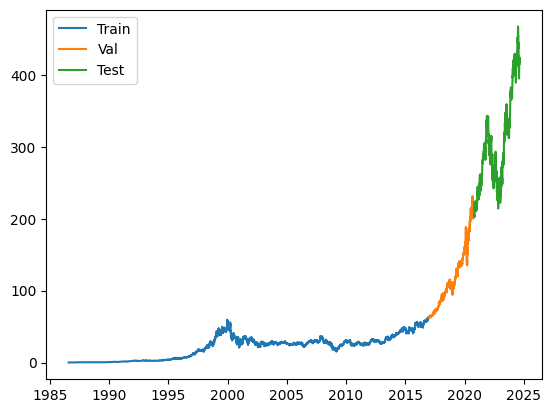

In [58]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((100, 1)),

                    layers.LSTM(64),
                    layers.LSTM(32),

                    layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(16, activation='relu'),

                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 335.6478 - mean_absolute_error: 11.1108 - val_loss: 8828.7549 - val_mean_absolute_error: 76.7364
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.4845 - mean_absolute_error: 0.4029 - val_loss: 8385.0186 - val_mean_absolute_error: 73.3809
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 0.3621 - mean_absolute_error: 0.3664 - val_loss: 8196.0518 - val_mean_absolute_error: 71.9996
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.3242 - mean_absolute_error: 0.3436 - val_loss: 8143.6035 - val_mean_absolute_error: 71.5836
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.3596 - mean_absolute_error: 0.3580 - val_loss: 8022.5713 - val_mean_absolute_error: 70.8491
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.3543 - mean_absolute_error: 0.3534 - val_loss: 7948.7725 - val_mean_absolute_error: 70.2616
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step 

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


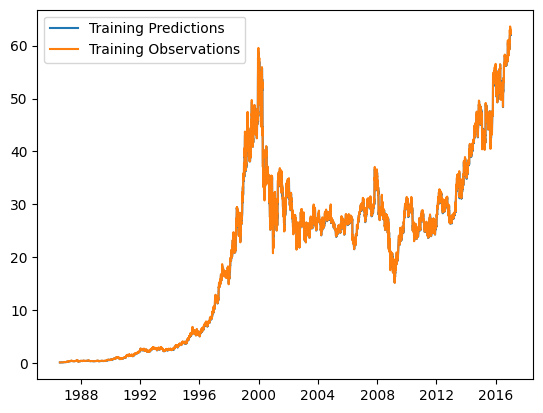

In [60]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


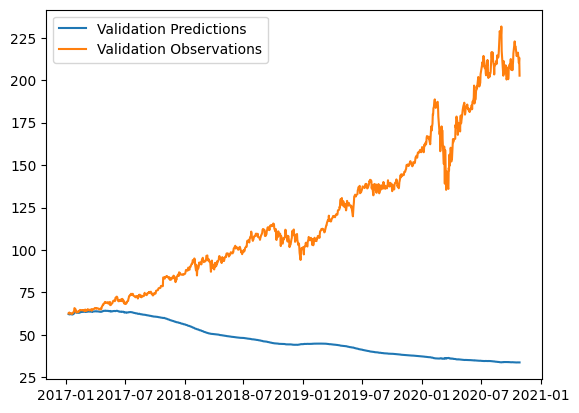

In [61]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


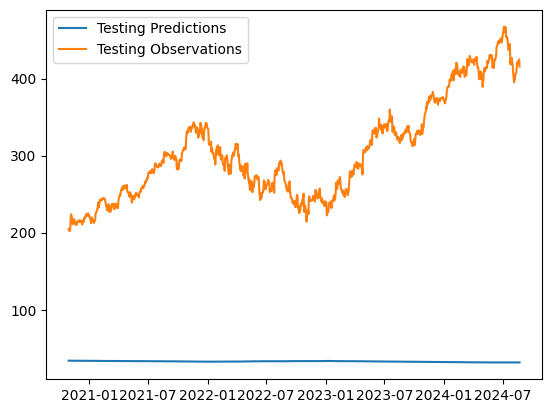

In [63]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
!pip install tensorflow
